In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
exclude = [
        'Diamond Princess',
        'Grand Princess',
        'American Samoa',
        'Virgin Islands',
        'Northern Mariana Islands',
        'Puerto Rico',
    ]

In [3]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    73475980.0
Deaths        1635427.0
Recovered    41615682.0
Active       30223750.0
dtype: float64

In [4]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,16716777,303773,0,16411881.0
Brazil,6970034,182799,6206483,580752.0
India,9932547,144096,9456449,332002.0
Mexico,1267202,115099,938089,214014.0
Italy,1870576,65857,1141406,663313.0
...,...,...,...,...
Holy See,27,0,15,12.0
Solomon Islands,17,0,5,12.0
Marshall Islands,4,0,4,0.0


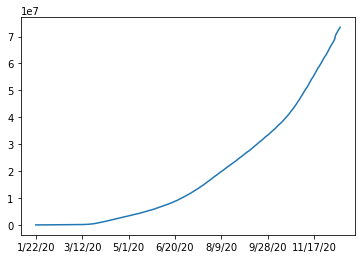

In [5]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

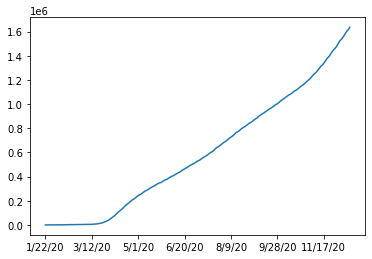

In [6]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

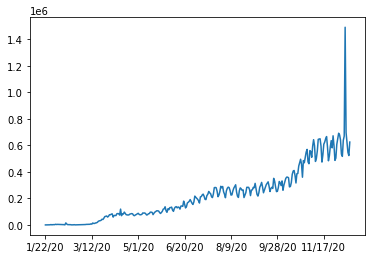

In [7]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

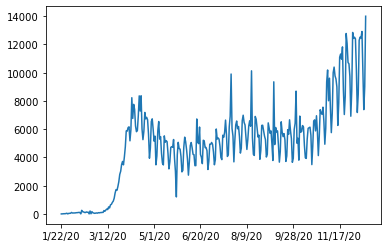

In [8]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

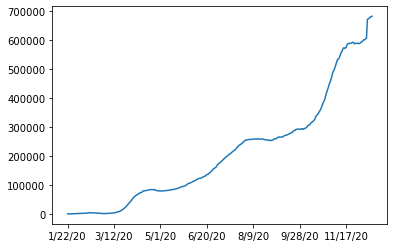

In [9]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

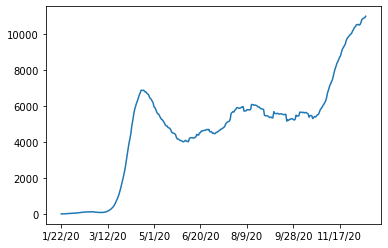

In [10]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [11]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,14819178,15011499,15231271,15454074,15680159,15913292,16134237,16325615,16518420,16716777
India,0,0,0,0,0,0,0,0,1,1,...,9677203,9703770,9735850,9767371,9796744,9826775,9857029,9884100,9906165,9932547
Brazil,0,0,0,0,0,0,0,0,0,0,...,6603540,6623911,6674999,6728452,6781799,6836227,6880127,6901952,6927145,6970034
Russia,0,0,0,0,0,0,0,0,0,2,...,2439163,2466961,2492713,2518551,2546113,2574319,2602048,2629699,2656601,2682866
France,0,0,2,3,3,3,4,5,5,5,...,2347595,2351006,2365043,2379718,2393590,2407079,2407079,2432559,2435751,2447406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Islands,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
MS Zaandam,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Marshall Islands,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [12]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,282386,283799,286335,289441,292184,295490,297842,299231,300754,303773
Brazil,0,0,0,0,0,0,0,0,0,0,...,176941,177317,178159,178995,179765,180437,181123,181402,181835,182799
India,0,0,0,0,0,0,0,0,0,0,...,140573,140958,141360,141772,142185,142628,143019,143355,143709,144096
Mexico,0,0,0,0,0,0,0,0,0,0,...,109717,110074,110874,111655,112326,113019,113704,113953,114298,115099
Italy,0,0,0,0,0,0,0,0,0,0,...,60078,60606,61240,61739,62626,63387,64036,64520,65011,65857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grenada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Timor-Leste,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dominica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,...,176327.0,192321.0,219772.0,222803.0,226085.0,233133.0,220945.0,191378.0,192805.0,198357.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26363.0,20371.0,51088.0,53453.0,53347.0,54428.0,43900.0,21825.0,25193.0,42889.0
Germany,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,...,10910.0,5456.0,29263.0,25089.0,32734.0,27217.0,21792.0,14709.0,6451.0,33825.0
Turkey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30402.0,32137.0,33198.0,31712.0,823225.0,32106.0,29136.0,26919.0,29617.0,32102.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,32981.0,26567.0,32080.0,31521.0,29373.0,30031.0,30254.0,27071.0,22065.0,26382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
Central African Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Solomon Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
global_new_confirmed_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.333333,0.25,0.8,0.666667,0.571429,0.714286,0.714286,0.857143,...,197617.428571,202706.571429,207902.142857,210808.000000,211732.000000,212240.571429,213055.142857,215205.285714,215274.428571,212215.142857
Brazil,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,41257.142857,41147.571429,41173.142857,41686.000000,42102.142857,43179.857143,43278.571429,42630.285714,43319.142857,42147.857143
Germany,0.0,0.0,0.000000,0.00,0.0,0.166667,0.571429,0.571429,0.571429,0.714286,...,19837.000000,18584.857143,19227.285714,19486.428571,20792.571429,22399.285714,21780.142857,22322.857143,22465.000000,23116.714286
Turkey,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,31523.857143,31655.000000,32096.142857,32066.000000,145043.714286,144953.714286,144559.428571,144061.857143,143701.857143,143545.285714
India,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.142857,0.142857,...,35073.142857,34423.000000,33776.714286,33201.000000,32169.285714,31223.428571,30401.000000,29556.714286,28913.571429,28099.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.428571,1.571429,1.285714,1.142857,1.714286,1.428571,1.428571,1.428571,1.142857,0.714286
Central African Republic,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.285714,1.285714,1.285714,1.285714,1.285714,2.571429,2.000000,2.000000,2.000000,1.285714
Solomon Islands,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1106.0,1413.0,2536.0,3106.0,2743.0,3306.0,2352.0,1389.0,1523.0,3019.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,313.0,376.0,842.0,836.0,770.0,672.0,686.0,279.0,433.0,964.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,445.0,568.0,458.0,604.0,503.0,333.0,206.0,528.0,910.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,564.0,528.0,634.0,499.0,887.0,761.0,649.0,484.0,491.0,846.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.0,357.0,800.0,781.0,671.0,693.0,685.0,249.0,345.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Qatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
global_new_deaths_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2200.285714,2231.714286,2222.857143,2267.000000,2248.000000,2349.857143,2366.000000,2406.428571,2422.142857,2491.142857
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,586.857143,599.571429,620.285714,640.000000,642.142857,639.000000,642.142857,637.285714,645.428571,662.857143
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,383.285714,391.428571,403.571429,400.142857,423.857143,427.142857,437.285714,445.285714,457.142857,506.000000
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,739.142857,718.571429,697.000000,670.571429,655.428571,647.857143,646.000000,634.571429,629.285714,659.571429
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,580.285714,590.571429,587.000000,584.285714,593.285714,593.714286,606.857143,605.142857,603.428571,603.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Qatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.285714,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714,0.285714
Fiji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.000000,0.000000,0.285714,0.285714,0.428571,0.428571,0.428571,0.428571,0.428571


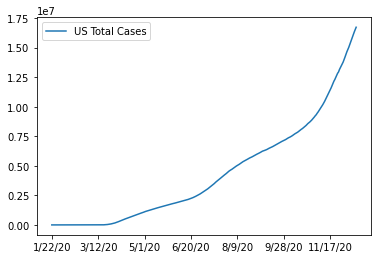

In [17]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

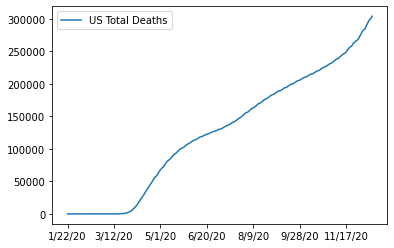

In [18]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

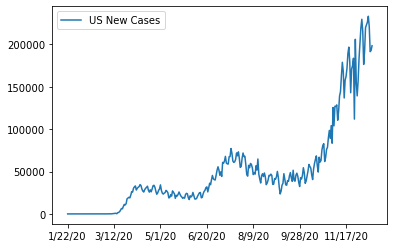

In [19]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

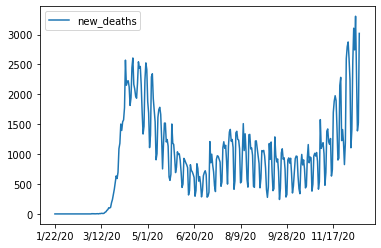

In [20]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
California,33249
Texas,20589
New York,10420
Pennsylvania,9575
Florida,9411
Ohio,8755
Tennessee,8251
Georgia,7437
Illinois,7359


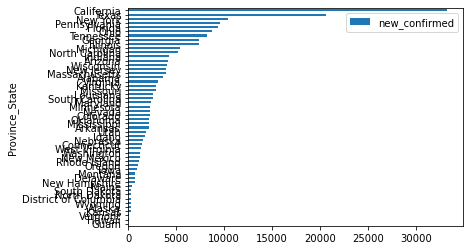

In [21]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
California,276
Pennsylvania,244
Missouri,224
Texas,208
Michigan,206
Illinois,133
New York,129
Indiana,128
Colorado,116


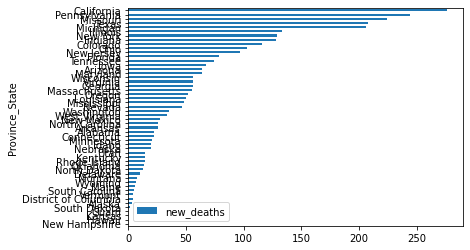

In [22]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

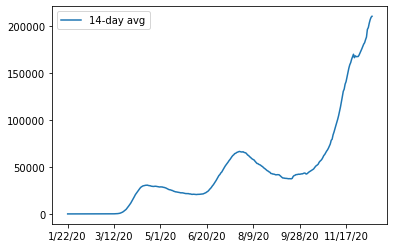

In [23]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

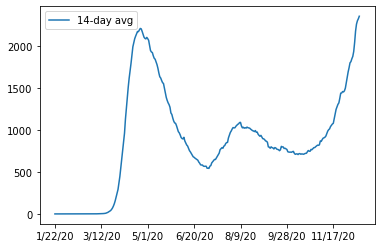

In [24]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [25]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,269877,272229,276665,280187,284922,288775,292841,295631,297895,301533
Alaska,0,0,0,0,0,0,0,0,0,0,...,37036,37539,38116,38707,39345,39975,40497,41143,41573,41858
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,364276,365843,378157,382601,387529,394512,402589,408442,420248,424382
Arkansas,0,0,0,0,0,0,0,0,0,0,...,170924,172042,174325,176652,178854,181624,184252,185702,187057,189198
California,0,0,0,0,2,2,2,2,2,3,...,1366673,1390828,1415396,1448987,1482551,1516215,1549176,1585378,1611493,1644742
Colorado,0,0,0,0,0,0,0,0,0,0,...,260581,264618,268589,272346,276995,281673,285634,288193,291104,293382
Connecticut,0,0,0,0,0,0,0,0,0,0,...,127715,135844,138258,140548,142979,146761,146761,146761,153992,155462
Delaware,0,0,0,0,0,0,0,0,0,0,...,39912,40711,41464,42393,43036,43818,44876,45460,46457,47142


In [26]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,3889,3892,3942,3985,4034,4086,4102,4102,4102,4124
Alaska,0,0,0,0,0,0,0,0,0,0,...,143,146,146,150,155,158,176,176,176,179
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,6950,6950,6973,7081,7154,7245,7322,7357,7358,7422
Arkansas,0,0,0,0,0,0,0,0,0,0,...,2660,2713,2752,2786,2820,2875,2911,2945,2990,3016
California,0,0,0,0,0,0,0,0,0,0,...,19928,20015,20205,20411,20603,20787,20958,21040,21144,21420
Colorado,0,0,0,0,0,0,0,0,0,0,...,3356,3358,3372,3639,3759,3846,3871,3958,3969,4085
Connecticut,0,0,0,0,0,0,0,0,0,0,...,5146,5224,5242,5285,5327,5363,5363,5363,5444,5466
Delaware,0,0,0,0,0,0,0,0,0,0,...,793,793,803,803,806,807,815,816,816,826


In [27]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2288.0,2352.0,4436.0,3522.0,4735.0,3853.0,4066.0,2790.0,2264.0,3638.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,765.0,503.0,577.0,591.0,638.0,630.0,522.0,646.0,430.0,285.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5376.0,1567.0,12314.0,4444.0,4928.0,6983.0,8077.0,5853.0,11806.0,4134.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1542.0,1118.0,2283.0,2327.0,2202.0,2770.0,2628.0,1450.0,1355.0,2141.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,28732.0,24155.0,24568.0,33591.0,33564.0,33664.0,32961.0,36202.0,26115.0,33249.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3234.0,4037.0,3971.0,3757.0,4649.0,4678.0,3961.0,2559.0,2911.0,2278.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8129.0,2414.0,2290.0,2431.0,3782.0,0.0,0.0,7231.0,1470.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,816.0,799.0,753.0,929.0,643.0,782.0,1058.0,584.0,997.0,685.0


In [28]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,3.0,50.0,43.0,49.0,52.0,16.0,0.0,0.0,22.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,4.0,5.0,3.0,18.0,0.0,0.0,3.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,23.0,108.0,73.0,91.0,77.0,35.0,1.0,64.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,53.0,39.0,34.0,34.0,55.0,36.0,34.0,45.0,26.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,87.0,190.0,206.0,192.0,184.0,171.0,82.0,104.0,276.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,2.0,14.0,267.0,120.0,87.0,25.0,87.0,11.0,116.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78.0,18.0,43.0,42.0,36.0,0.0,0.0,81.0,22.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,10.0,0.0,3.0,1.0,8.0,1.0,0.0,10.0
